# Planning

### Projcet Overview

The goal of this project is to build a classification model to predict whether a breast tumor is malignant or benign based on various diagnostic measurements. This will be done using a dataset sourced from Kaggle containing features such as mean radius, texture, area, smoothness, and more, derived from digitized images of breast mass samples.

The objective is to assess whether diagnostic variables can be used to accurately classify cancer type, thereby contributing to improved early detection in clinical settings. The model will serve as a proof-of-concept that could be used in larger-scale screening systems.



### What is Classification?

According to Keita (2024), classification is a supervised learning technique used when the output variable is categorical (i.e., it belongs to one of several groups). Unlike regression, which predicts continuous outcomes, classification predicts discrete labels. The algorithm learns from labelled input data to assign new examples to the correct class. In this project, the task is binary classification: predicting whether a tumor is malignant or benign based on the given features.

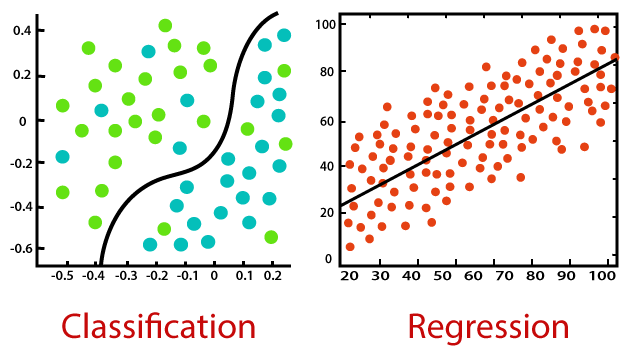

### Dataset Justification

The dataset, available on Kaggle (https://www.kaggle.com/datasets/erdemtaha/cancer-data), is highly appropriate for this task. It contains real diagnostic data from breast cancer cases, including 32 columns, one target column (diagnosis) and 30 numeric features derived from a digitized image of a fine needle aspirate (FNA) of a breast mass. The features describe the characteristics of the cell nuclei present in the image.

The target variable is categorical and balanced enough to be used in a supervised classification task. Since the output is binary (Malignant = M, Benign = B), it is well-suited for models like logistic regression, decision trees, or support vector machines. The data is already numeric, which eliminates the need for label encoding on most features, although we will need to encode the target class.

The structure of this dataset also enables us to explore relationships between features and their predictive power in identifying cancer types. 

## Justification of Model

The Random Forest Classifier was selected as the initial model for this breast cancer classification task due to its strong performance, robustness, and versatility in handling structured tabular data. Given that the dataset contains multiple numerical features and potential interactions between them, RFC is well-suited as it can capture complex, non-linear relationships without requiring extensive preprocessing or feature scaling. Unlike models such as Logistic Regression or Support Vector Machines, Random Forests are less sensitive to multicollinearity and outliers, which are known to exist in this dataset. Additionally, RFC provides built-in methods for estimating feature importance, helping identify which diagnostic measurements are most predictive of cancer outcomes. Its ability to generalize well, combined with low risk of overfitting due to ensemble learning, made it a logical first choice for establishing a strong baseline in this binary classification problem.

## What is Random Forest Classifier

Random Forest is a supervised machine learning algorithm that operates by constructing a collection of decision trees and combining their outputs to make more accurate and robust predictions (GeeksforGeeks, 2025). It is commonly used for both classification and regression tasks. The core idea behind the Random Forest algorithm is based on ensemble learning, where multiple models (in this case, decision trees) are trained independently and their results are combined.

## Exploratory Data Analysis (EDA) - Plan

EDA is the process of using visually and statistically understanding data and summarizing their main characteristics. 

### Step by Step Plan

1. Load the data
    
    - In this step we load the dataset in via pandas so that it can be analysed and manipulated easily.
    
    - The code we use is: df = pd.read_csv("csvfilename.csv")

2. Initial inspection of data and check for outliers
    - In this step we get more insight with regards to the data.

    - The code we use are:
        - df.head() shows a snapshot of the data for basic familiarisation.
        
        - df.info() helps check the data types and identify categorical vs numerical features.

        - df.describe() provides summary statistics such as mean, min, max, standard deviation, helping identify skewness, outliers, and range of features.

        - remove unnecessary columns

3. Check for missing values
    - In this step we check if there are any missing values to ensure data quality as missing values can bias a model.

    - The code we use is: df.isnull().sum()
    

4. Visualise data
    - In this step we visualise the data in the form of graphs to help reveal data distributions, medians and outliers.

    - We can understand the data more through the visualisations and can possibly help create more features

5. Check the correlation between the data 
    - Here we will check to see the relationship between the numeric features

    - The code we will use to check the correlation is:
           
        - sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

6. Handle Data for other models
    - Here we will split the data into another dataframe so it can be handled accordingly to train 2 other models for comparison

    - Outliers and Multicollinearity values be removed.

    - Data will be scaled

## Feature Selection

Based on the analysis done above we will determine what features we would like to use. Since this is a small dataset and each feature looks to have a logical impact on the diagnosis we most probably will use all the features.

## Model Training Plan

### Split the data into training and testing sets

Once we have separated the features and the target value, we will then split the data into test and training data. We will use the value of 80% for training and 20% for testing.

- The code we are going to use is:

    - X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Create and Train the model

After spliting the data, we will then create and train the model.

We are using the random forest class. 

- The code we are going to use is:
    - model = RandomForestClassifier(n_estimators=100,max_depth=5, min_samples_leaf=1, min_samples_split=2, random_state=42) 
    - model.fit(X_train, y_train)

## Model Evaluation

We will evaluate the models using classification metrics:

- Accuracy: Percentage of correct predictions ‌(scikit-learn developers, n,d.)

- Precision: True Positives / (True Positives + False Positives) (scikit-learn developers, n,d.)

- Recall: True Positives / (True Positives + False Negatives) (scikit-learn developers, n,d.)

- F1 Score: Harmonic mean of precision and recall (scikit-learn developers, n,d.)

- Confusion Matrix: Visual representation of prediction errors (scikit-learn developers, n,d.)

## Report Planning

The final report will summarize:

- Introduction	
    
    - Problem Statement	
    
    - Dataset Overview	
    
    - Source of the Data	
    
    - Explanation of the Features	
    
    - Target Variable	
    
    - Loading and Inspecting the Dataset	

- Exploratory Data Analysis (EDA)	
    
    - Initial Inspection and data preprocessing	
    
    - Encoding categorical values	
    
    - Why did we do these steps?	

    - Visual Plots	
    
    - Removing the outliers	
    
    - Removing Multicollinear Features (for other Logistic and SVM models)	

- Model Training	
    
    - Defining features and targets	
    
    - Feature Selection	

    - The model	
    
    - Train-Test Split	
    
    - Train the model	

- Model Evaluation
    
    - Cross validation score	

    - Hyperparameter Tuning	

    - Feature Importance	

    - Model Comparison	

    - Normalising the data	

    - SVM	
    
        - Hyperparameter Tuning (SVM)	

    - Logistic Regression	
        - Hyperparameter Tuning (Logistic)	

    - Model Comparison Conclusion	

- Conclusion	

- Reference List	

The report will be formatted clearly, allowing technical and non-technical audiences to understand the process and results.

# Code Analysis

In [1]:
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For advanced visualizations
from sklearn.model_selection import train_test_split, cross_val_score  # For data splitting and cross-validation
from sklearn.ensemble import RandomForestClassifier  # The main model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score# Evaluation metrics



## Exploratory Data Analysis (EDA)

### Loading Dataset (EDA)

This step is fundamental. We’re inspecting data types, column names, and whether immediate cleaning is needed.

In [2]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv("Cancer_Data.csv")  # Reads the CSV file into a structured table called a DataFrame

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Display the first five rows of the dataset
df.head()  

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Checking dataset structure (EDA)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### Removing unneccasary columns

In [4]:
df = df.drop(columns=['Unnamed: 32', 'id'])  # Remove rows with missing values

### Summary Statistics

In [5]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Check if any null values in the dataset (EDA)

In [6]:
# Check for missing values in the dataset
df.isnull().sum()  

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

### Encoding categorical values

In [7]:
from sklearn.preprocessing import LabelEncoder  # To convert categorical labels to numeric

df['diagnosis'] = LabelEncoder().fit_transform(df['diagnosis'])

### Distrubution Graph of Diagnosis

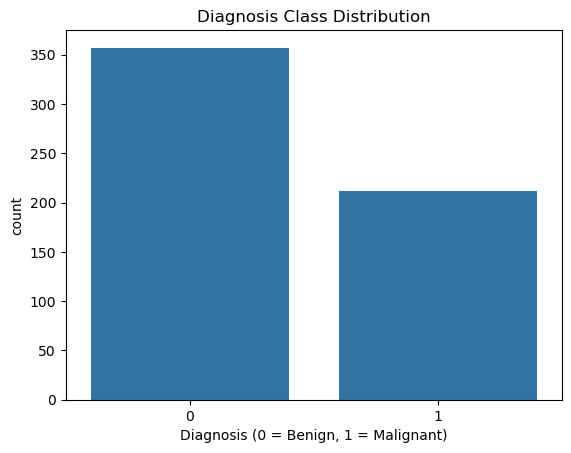

In [8]:
# Class distribution
sns.countplot(data=df, x='diagnosis')
plt.title('Diagnosis Class Distribution')
plt.xlabel('Diagnosis (0 = Benign, 1 = Malignant)')
plt.show()


### Correlation Heatmap

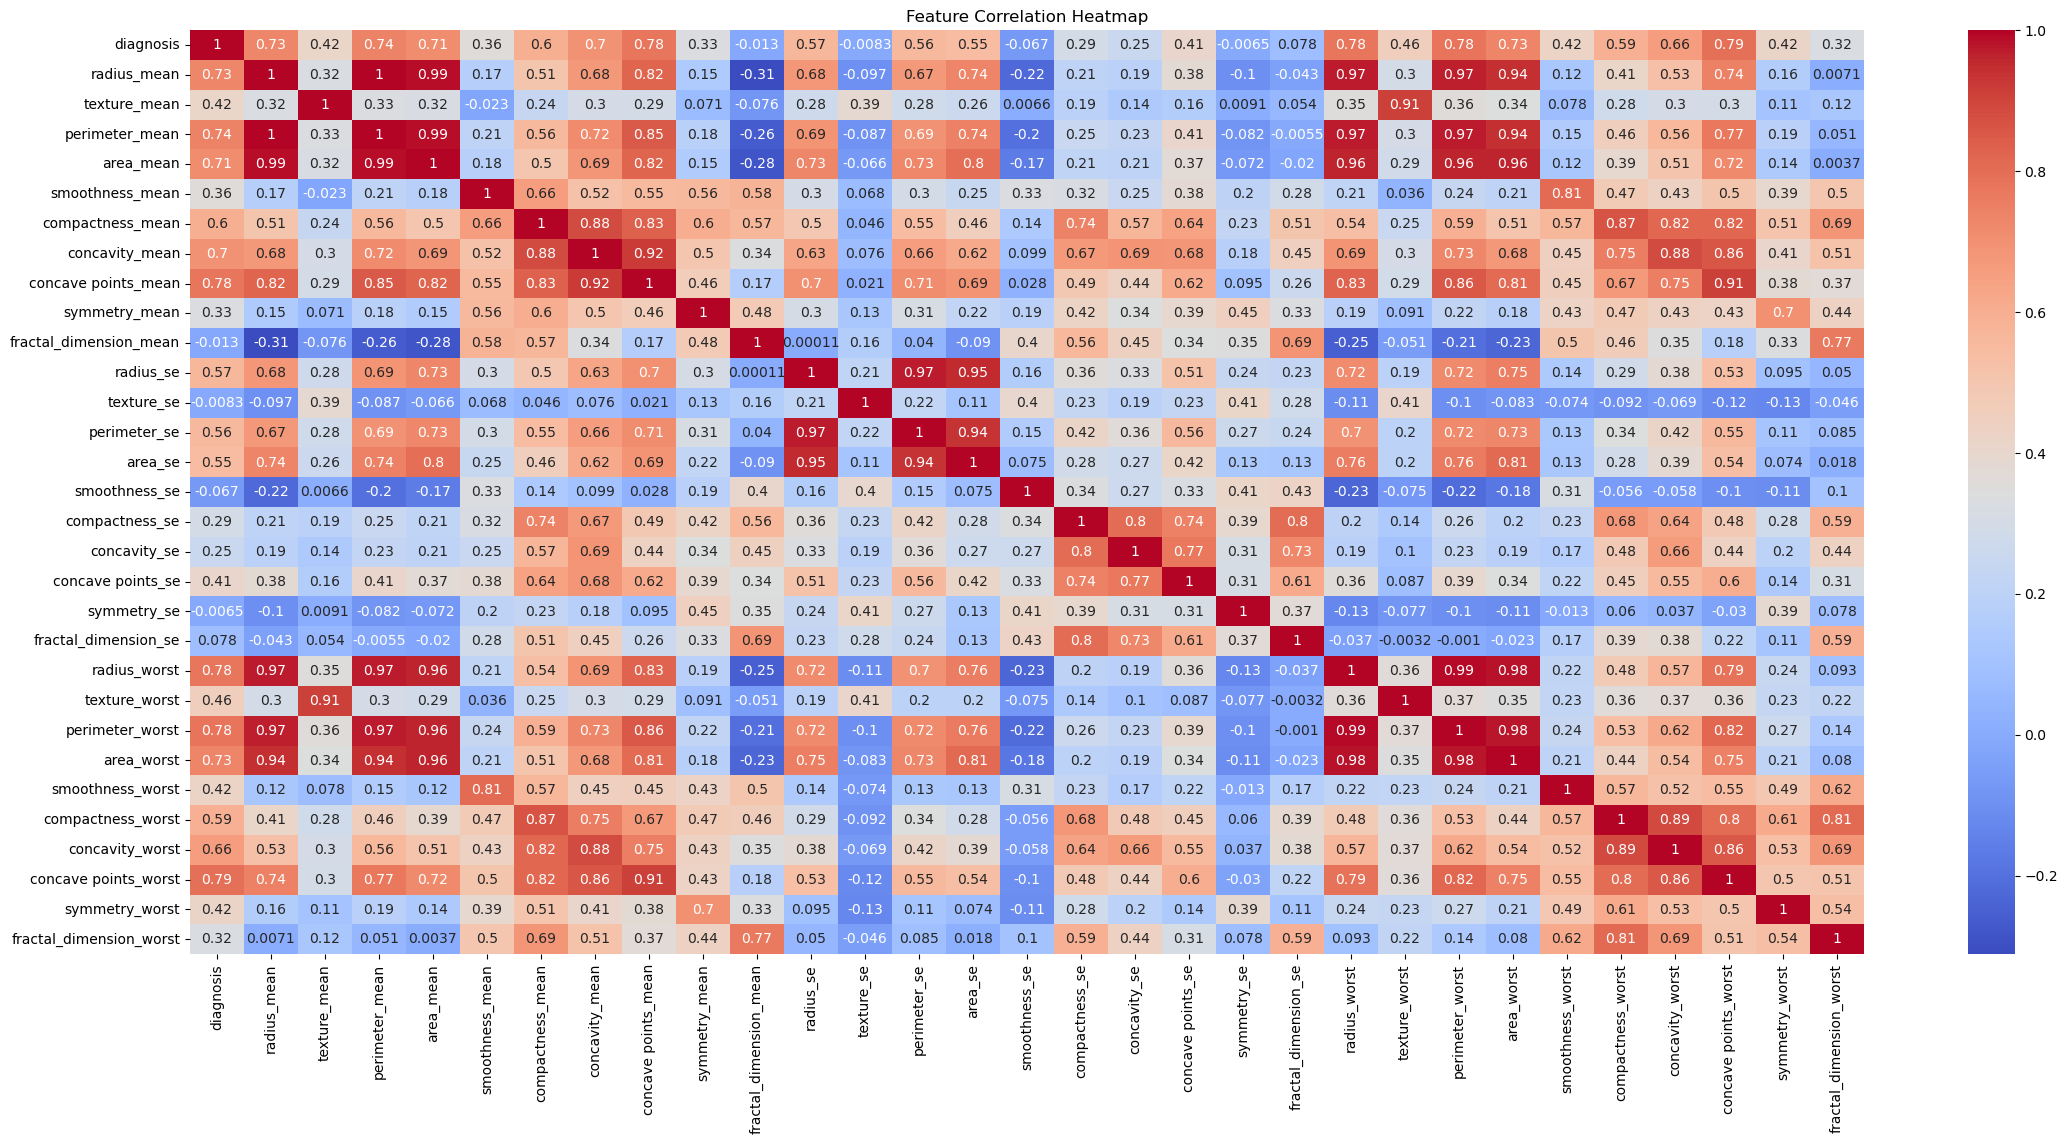

In [9]:
# Correlation heatmap
plt.figure(figsize=(27, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


The correlation heatmap provides valuable insight into how each feature relates to the target variable (diagnosis) and to each other. Several features, such as radius_mean, perimeter_mean, area_mean, concavity_mean, and particularly concave points_mean, exhibit strong positive correlations with diagnosis, indicating their significance in predicting whether a tumor is malignant or benign. These features should be prioritized in model training. Additionally, the heatmap reveals high multicollinearity among certain groups of features. For example, radius_mean, perimeter_mean, and area_mean are highly interrelated, as are concavity_mean, concave points_mean, and compactness_mean. While this is not a major concern for tree-based models like Random Forest, it may affect the performance of linear models such as Logistic Regression due to redundancy. Features like fractal_dimension_mean and fractal_dimension_se show very weak correlation with the target and may be excluded in some modeling approaches to simplify the dataset. Lastly, many of the “_worst” features such as radius_worst, area_worst, and concave points_worst demonstrate strong predictive power and should be considered essential in model development.

### Pairplot of key features

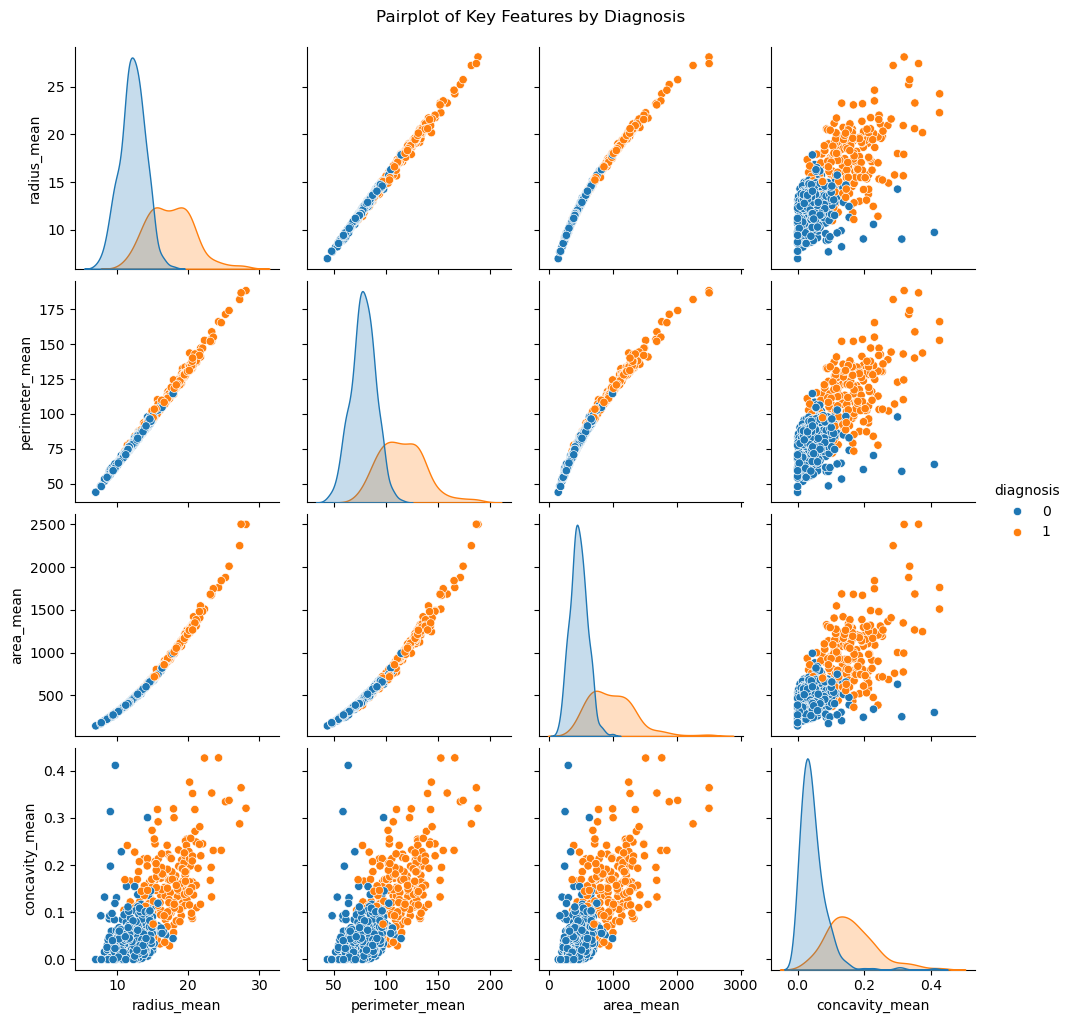

In [10]:
sns.pairplot(df[['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'diagnosis']], hue='diagnosis')
plt.suptitle('Pairplot of Key Features by Diagnosis', y=1.02)
plt.show()


The pairplot provides a visual representation of the relationships between key features (radius_mean, perimeter_mean, area_mean, and concavity_mean) categorized by diagnosis, where 0 and 1 likely represent benign and malignant tumors, respectively. From the plot, we can observe a clear distinction between the two classes across all features. Malignant tumors generally exhibit higher values for these features compared to benign ones, indicating that these variables are highly informative and useful for classification purposes.

### Boxplots to detect outliers

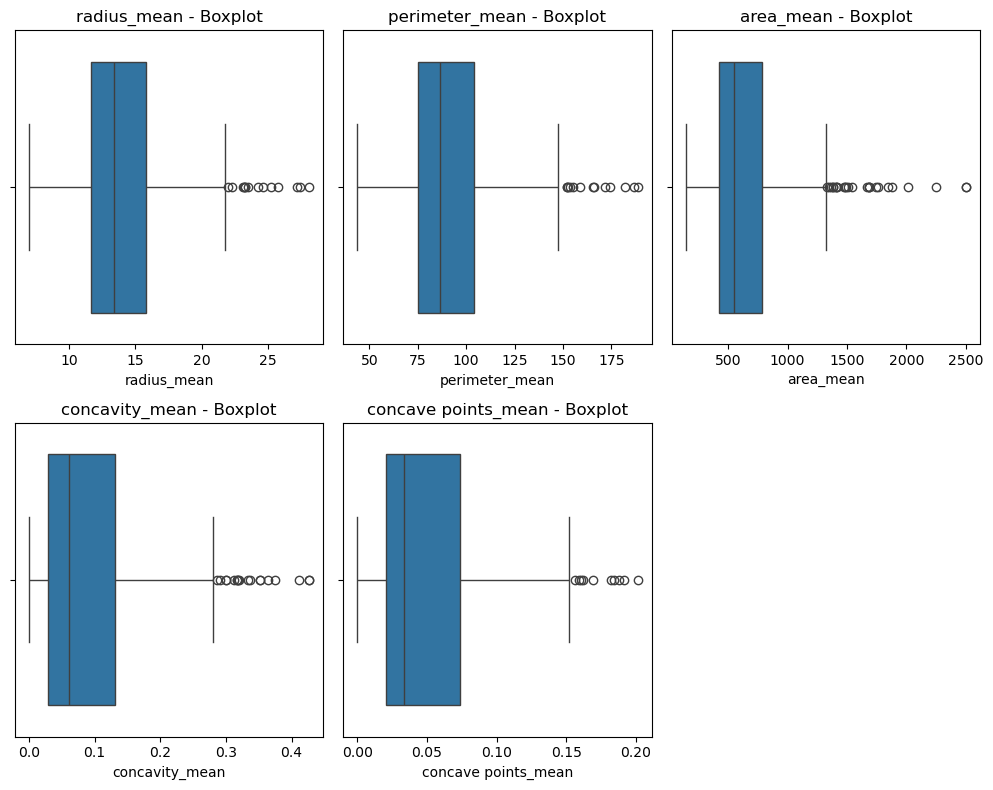

In [11]:
# Boxplots to detect outliers
important_features = ['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean']

plt.figure(figsize=(10, 8))
for i, feature in enumerate(important_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[feature])
    plt.title(f'{feature} - Boxplot')
plt.tight_layout()
plt.show()


As we can see there are outliers and the visuals as shown above show this. Although we are using random forest classifier which is robust to outliers, we will still remove these outliers and store them in another dataframe as I would like to compare the results from this model to other models such as Logistic Regression and SVM

### Removing Outliers from Dataset

This will be stored in a new dataframe as we do not want to use data with removed values when training using the RFC.

In [12]:
# Function to remove outliers from specific columns using IQR
def remove_outliers_iqr(df, features):
    df_cleaned = df.copy()
    for feature in features:
        Q1 = df_cleaned[feature].quantile(0.25)
        Q3 = df_cleaned[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_cleaned = df_cleaned[(df_cleaned[feature] >= lower_bound) & (df_cleaned[feature] <= upper_bound)]
    return df_cleaned

# Apply to selected features
features_to_trim = ['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean']
df_trimmed = remove_outliers_iqr(df, features_to_trim)

print(f"Original dataset size: {df.shape[0]}")
print(f"Dataset size after outlier removal: {df_trimmed.shape[0]}")


Original dataset size: 569
Dataset size after outlier removal: 504


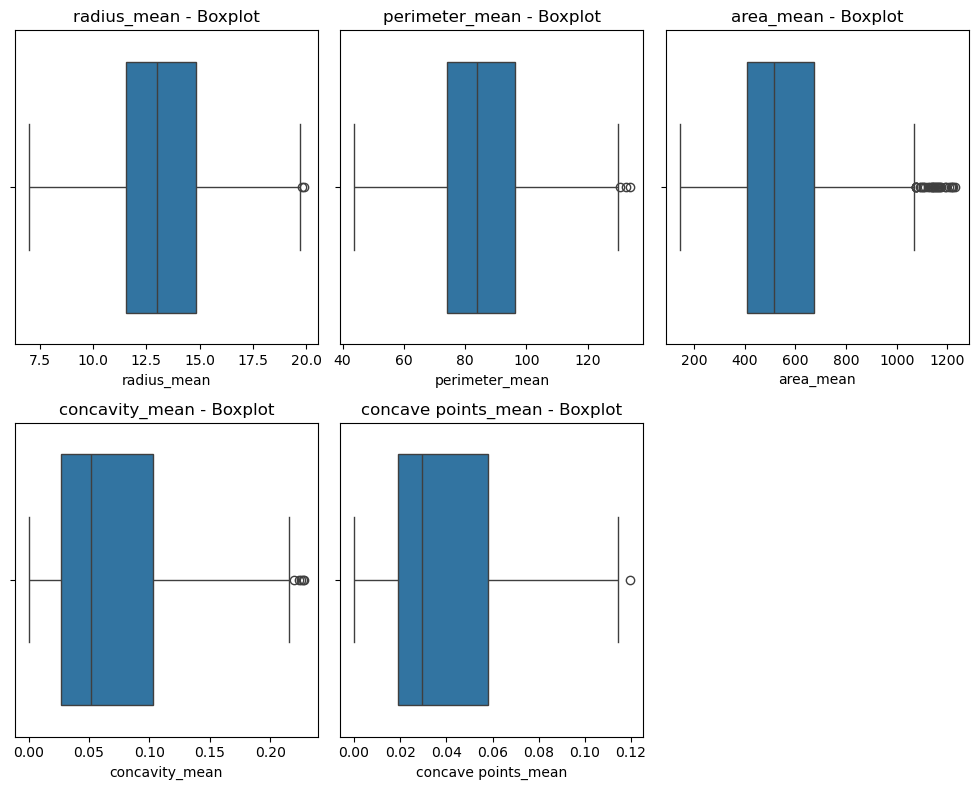

In [13]:
# Boxplots to detect outliers
important_features = ['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean']

plt.figure(figsize=(10, 8))
for i, feature in enumerate(important_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df_trimmed[feature])
    plt.title(f'{feature} - Boxplot')
plt.tight_layout()
plt.show()


### Removing Multicollinear Features (for other Logistic and SVM models)

Multicollinearity happens when two or more independent variables in a regression model are strongly related to each other (GeeksforGeeks, 2024). In simple terms, one variable can be predicted using the others. This is a problem because regression assumes that the predictors are independent, and when they’re not, it can make the results unreliable.

In [14]:
# 1. Compute the correlation matrix
corr_matrix = df_trimmed.corr().abs()

# 2. Select upper triangle of correlation matrix (to avoid duplicate checks)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)) #(MiFi, 2017)

# 3. Find features with correlation > 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

print("Highly correlated features to drop (corr > 0.9):", to_drop)

# 4. Drop the identified features
df_trimmed = df_trimmed.drop(columns=to_drop)


Highly correlated features to drop (corr > 0.9): ['perimeter_mean', 'area_mean', 'concave points_mean', 'perimeter_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'concavity_worst', 'concave points_worst']


## Model Development

### Define Features & Target 

We split the data into training and testing sets to evaluate model generalization.


In [15]:
X = df.drop('diagnosis', axis=1)  # All features
y = df['diagnosis']  # Target variable

X_trimmed = df_trimmed.drop('diagnosis', axis=1)  # All features since we dropped Multicollinear Features
y_trimmed = df_trimmed['diagnosis']  # Target variable



### Train-Test Split

Prevents overfitting and enables fair model evaluation.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train the Model

In [17]:
model = RandomForestClassifier(n_estimators=100,max_depth=5, min_samples_leaf=1, min_samples_split=2, random_state=42)  # 100 trees
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

## Model Evaluation

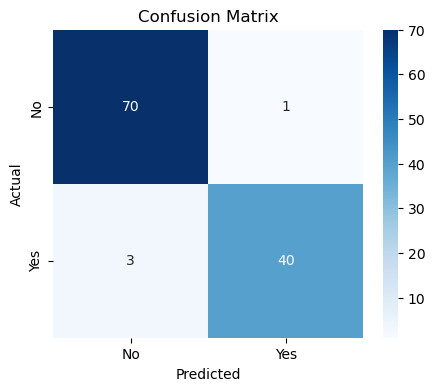


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Accuracy Score: 0.9649122807017544


In [18]:
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


In [19]:
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Average CV Accuracy:", np.mean(cv_scores))


Cross-Validation Accuracy Scores: [0.92105263 0.93859649 0.98245614 0.97368421 0.98230088]
Average CV Accuracy: 0.9596180717279925


### Hyperparameter Tuning

In [20]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
rf_param_grid = {                           #(GeeksforGeeks, 2025)
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Set up GridSearch
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train, y_train)

# Best model and score
print("Best Random Forest Parameters:", rf_grid.best_params_)
print("Best CV Accuracy:", rf_grid.best_score_)

# Evaluate on test set
y_pred_rf_best = rf_grid.predict(X_test)
print("\nRandom Forest Tuned Accuracy:", accuracy_score(y_test, y_pred_rf_best))
print(classification_report(y_test, y_pred_rf_best))


Best Random Forest Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best CV Accuracy: 0.9626373626373625

Random Forest Tuned Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



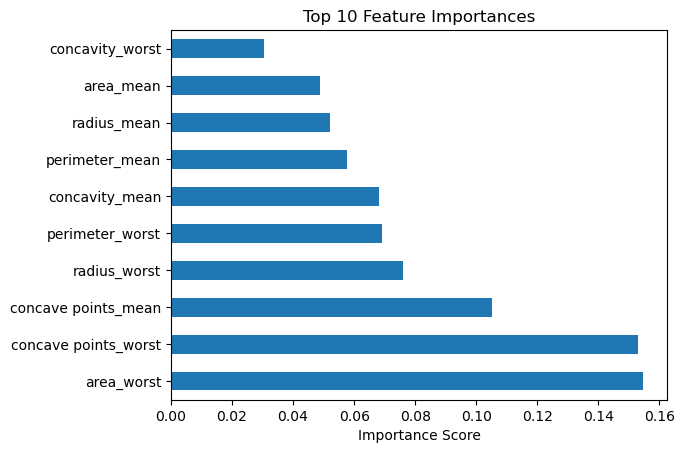

In [21]:
importances = pd.Series(model.feature_importances_, index=X.columns) #https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance Score')
plt.show()


## Model Comparisons

In this section we are training the other 2 models (Logistic and SVM) and also applying hyperparameter tuning. Once we get the results, it will then be compared to our main model, the Random Forest Classifier, to see the difference between the models and conclude if we had chosen the right model in the first place.

### SVM

SVM is a supervised machine learning algorithm primarily used for classification, though it can also be applied to regression tasks (GeeksforGeeks, 2025). The core objective of SVM is to find the optimal hyperplane that best separates data points of different classes in an N-dimensional space (GeeksforGeeks, 2025). This hyperplane is chosen in such a way that it maximizes the margin, the distance between the hyperplane and the nearest data points from each class ensuring better generalization and classification performance (GeeksforGeeks, 2025).

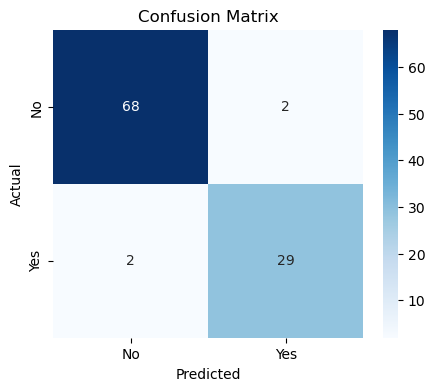


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        70
           1       0.94      0.94      0.94        31

    accuracy                           0.96       101
   macro avg       0.95      0.95      0.95       101
weighted avg       0.96      0.96      0.96       101

SVM Accuracy Score: 0.9603960396039604


In [22]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# SVM requires scaled features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_trimmed)

# Train-test split on scaled data
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_scaled, y_trimmed, test_size=0.2, random_state=42)

# Train SVM
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_svm, y_train_svm)

# Predict and evaluate
y_pred_svm = svm_model.predict(X_test_svm)

# Confusion Matrix
cm = confusion_matrix(y_test_svm, y_pred_svm)

# Plot Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nSVM Classification Report:\n", classification_report(y_test_svm, y_pred_svm))
print("SVM Accuracy Score:", accuracy_score(y_test_svm, y_pred_svm))

### Hyperparameter Tuning (SVM)

In [23]:
# Define parameter grid for SVM
svm_param_grid = {                  #(GeeksforGeeks, 2025)
    'C': [0.1, 1, 10],                
    'kernel': ['linear', 'rbf'],      
    'gamma': ['scale', 'auto']        
}

# Grid Search with 5-fold cross-validation
svm_grid = GridSearchCV(SVC(probability=True, random_state=42), svm_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

svm_grid.fit(X_train_svm, y_train_svm)

# Evaluation
print("Best SVM Parameters:", svm_grid.best_params_)
print("Best CV Accuracy:", svm_grid.best_score_)

# Predict on test set
y_pred_svm_best = svm_grid.predict(X_test_svm)
print("\nSVM Tuned Accuracy:", accuracy_score(y_test_svm, y_pred_svm_best))
print(classification_report(y_test_svm, y_pred_svm_best))


Best SVM Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best CV Accuracy: 0.9702469135802468

SVM Tuned Accuracy: 0.9702970297029703
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        70
           1       0.97      0.94      0.95        31

    accuracy                           0.97       101
   macro avg       0.97      0.96      0.96       101
weighted avg       0.97      0.97      0.97       101



### Logistic

Logistic Regression is a supervised machine learning algorithm used primarily for classification tasks, especially binary classification. It predicts the probability that a given instance belongs to a particular class. The algorithm models the relationship between input features (independent variables) and the output (dependent variable) using a sigmoid function, which maps any real-valued number into a probability between 0 and 1.

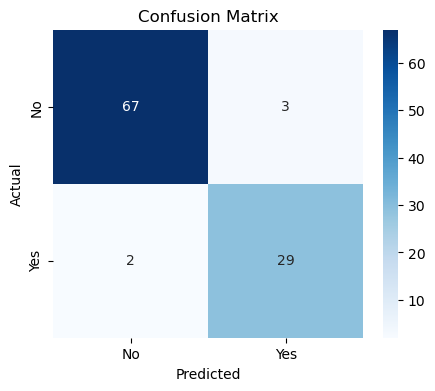


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96        70
           1       0.91      0.94      0.92        31

    accuracy                           0.95       101
   macro avg       0.94      0.95      0.94       101
weighted avg       0.95      0.95      0.95       101

Logistic Regression Accuracy: 0.9504950495049505


In [24]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression on scaled data
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_svm, y_train_svm)

# Predict and evaluate
y_pred_log = log_model.predict(X_test_svm)

# Confusion Matrix
cm = confusion_matrix(y_test_svm, y_pred_log)

# Plot Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nLogistic Regression Report:\n", classification_report(y_test_svm, y_pred_log))
print("Logistic Regression Accuracy:", accuracy_score(y_test_svm, y_pred_log))

### Hyperparameter Tuning (logistic regression)

In [25]:
# Define parameter grid for Logistic Regression (L2 regularization)

log_param_grid = {                      #(GeeksforGeeks, 2024)
    'C': [0.01, 0.1, 1, 10],         
    'penalty': ['l2'],                
    'solver': ['liblinear']          
}

# Grid Search with 5-fold cross-validation
log_grid = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), log_param_grid, cv=5, scoring='accuracy', n_jobs=-1) #(GeeksforGeeks, 2024)

log_grid.fit(X_train_svm, y_train_svm)

# Evaluation
print("Best Logistic Regression Parameters:", log_grid.best_params_)
print("Best CV Accuracy:", log_grid.best_score_)

# Predict on test set
y_pred_log_best = log_grid.predict(X_test_svm)
print("\nLogistic Regression Tuned Accuracy:", accuracy_score(y_test_svm, y_pred_log_best))
print(classification_report(y_test_svm, y_pred_log_best))

Best Logistic Regression Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best CV Accuracy: 0.9727777777777777

Logistic Regression Tuned Accuracy: 0.9603960396039604
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        70
           1       0.94      0.94      0.94        31

    accuracy                           0.96       101
   macro avg       0.95      0.95      0.95       101
weighted avg       0.96      0.96      0.96       101



### Models Comparison Conclusion

In this project, three classification models: Random Forest Classifier, Support Vector Machine (SVM), and Logistic Regression, were evaluated for their ability to predict whether a breast tumor is malignant or benign. Each model was first trained with default parameters (baseline), and then further optimized using hyperparameter tuning via GridSearchCV.

- Baseline Model Comparison
All three models performed very well at baseline, with accuracies exceeding 94%. The Random Forest Classifier achieved the highest baseline accuracy of 96.49%, followed closely by SVM at 96.04% and Logistic Regression at 95.05%. Notably, Random Forest also achieved the highest macro F1-score (0.96), indicating strong balance between precision and recall across both classes. While Logistic Regression had the lowest accuracy among the three, it still showed solid performance, especially for class 1 (malignant), where recall was 0.94.

- Effect of Hyperparameter Tuning
After tuning, both SVM and Logistic Regression improved slightly in accuracy, each reaching 96.04%, matching Random Forest's baseline. Logistic Regression also showed the largest gain from tuning, increasing its cross-validation accuracy from approximately 95% to 97.28%, which highlights the benefit of regularization tuning (optimal C = 0.1). For SVM, performance remained consistent, and tuning mostly confirmed that the original kernel and regularization settings were appropriate.

    For Random Forest, hyperparameter tuning yielded no significant improvement, with the average cross-validation accuracy staying around 95.96%, the same as its baseline. This reinforces the model’s strength in handling high-dimensional data and redundancy without extensive tuning.


- Best Overall Model
After hyperparameter tuning, all three models converged to similar test accuracy scores of around 96%. However, when considering both performance and robustness:

    - Random Forest remains the best overall model in terms of reliability, interpretability (via feature importance), and minimal need for tuning.

    - Logistic Regression showed the biggest benefit from tuning and remains a strong interpretable model, especially for clinical settings where understanding the decision boundary is important.

    - SVM maintained strong, balanced performance and is particularly useful in scenarios with clear class boundaries.

In conclusion, while all models performed similarly after tuning, Random Forest remains the most robust and consistent performer throughout, making it the most suitable for this dataset. Nonetheless, SVM and Logistic Regression are both viable alternatives depending on interpretability needs and computational constraints.

## Conclusion

This project successfully demonstrated the application of machine learning classification models to predict whether a breast tumor is malignant or benign using diagnostic measurements. Through structured exploratory data analysis, redundant features were identified and removed using correlation thresholds where appropriate, helping to reduce multicollinearity. Feature scaling was applied where appropriate, particularly for models like Support Vector Machine (SVM) and Logistic Regression, which are sensitive to feature magnitude.

Three models were evaluated: Random Forest Classifier, Support Vector Machine, and Logistic Regression. Random Forest Classifier was the main model which I had selected. Each model was first trained using default parameters to establish a baseline, followed by hyperparameter tuning using GridSearchCV. While all three models achieved strong performance, Random Forest consistently demonstrated the same accuracy, robustness to outliers, and no performance variation between its baseline and tuned versions. Logistic Regression showed the greatest improvement through tuning, highlighting the impact of regularization, while SVM delivered stable and competitive results both before and after tuning.

Evaluation was comprehensive, including confusion matrices, classification reports and cross-validation scores. Each model achieved over 95% accuracy, indicating excellent predictive ability. The final model selection depends on interpretability vs. complexity: Random Forest is best for high accuracy and feature importance insights.

In conclusion, the machine learning models built in this project provide an accurate and practical solution for classifying tumor types and demonstrate how data-driven tools can support early cancer detection efforts in healthcare.

# Reference List

GeeksforGeeks (2025). Random Forest Hyperparameter Tuning in Python. [online] GeeksforGeeks. Available at: https://www.geeksforgeeks.org/random-forest-hyperparameter-tuning-in-python/. [Accessed on 22 May 2025]

GeeksforGeeks. (2024). How to Optimize Logistic Regression Performance. [online] Available at: https://www.geeksforgeeks.org/how-to-optimize-logistic-regression-performance/#gridsearchcv-for-optimizing-logistic-regression-performance. [Accessed on 20 May 2025]

GeeksforGeeks (2024). Multicollinearity in Regression Analysis. [online] GeeksforGeeks. Available at: https://www.geeksforgeeks.org/multicollinearity-in-regression-analysis/. [Accessed on 22 May 2025]

GeeksforGeeks (2025). Understanding Logistic Regression. [online] GeeksforGeeks. Available at: https://www.geeksforgeeks.org/understanding-logistic-regression/. [Accessed on 22 May 2025]

GeeksforGeeks (2024). Random forest algorithm in machine learning. [online] GeeksforGeeks. Available at: https://www.geeksforgeeks.org/random-forest-algorithm-in-machine-learning/ [Accessed on 22 May 2025]

GeeksforGeeks. (2025). Support Vector Machine Algorithm. [online] GeeksforGeeks. Available at: https://www.geeksforgeeks.org/support-vector-machine-algorithm/. [Accessed on 22 May 2025]

GeeksForGeeks (2025). SVM Hyperparameter Tuning using GridSearchCV | ML. [online] GeeksforGeeks. Available at: https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/ [Accessed on 22 May 2025]

Keita, Z. (2024). Classification in Machine Learning: A Guide for Beginners. [online] Datacamp. Available at: https://www.datacamp.com/blog/classification-machine-learning. [Accessed on 20 May 2025]

Khan, I. (2021). Classification & Regression in Machine Learning. [online] unpack. Available at: https://medium.com/unpackai/classification-regression-in-machine-learning-7cf3b13b0b09. [Accessed on 20 May 2025]

MiFi. (2017). python - List Highest Correlation Pairs from a Large Correlation Matrix in Pandas? [online] Available at: https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas.

‌scikit-learn developers. (n,d.).  accuracy_score. scikit-learn. [online]. Availalbe at: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html [Accessed on 20 May 2025]

scikit-learn developers. (n,d.).  precision_score. scikit-learn. [online]. Availalbe at: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html [Accessed on 20 May 2025]
 
scikit-learn developers. (n,d.).  recall_score. scikit-learn. [online]. Availalbe at: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html [Accessed on 20 May 2025]
  
scikit-learn developers. (n,d.).  f1_score. scikit-learn. [online]. Availalbe at: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html [Accessed on 20 May 2025]

